In [ ]:
import xarray as xr 
import matplotlib.pyplot as plt

import numpy as np                 #for general calculations.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

#this command allows interactive plots in noteboks
%matplotlib inline   
from pathlib import Path

from get_params import params
from pipeline.get_raw_data import raw_data
from pipeline.get_full_data import full_data
from pipeline.get_masked_data import masked_data
from pipeline.get_ids import ids

from src.generators import DataGenerator

In [1]:
lst = [1, 2, 3]
ite = iter(lst)
print(next(ite))
print(next(ite))
print(next(ite))
print(next(ite))

1
2
3


StopIteration: 

In [1]:
print("hello world")

hello world


In [1]:

import matplotlib.pyplot as plt
import imageio

In [6]:
train_ids = np.load('data/train_ids.npy')
val_ids = np.load('data/val_ids.npy')

my_params = params()
in_data = my_params['dataDir'] + '/masked_data'
out_data = my_params['dataDir'] + '/tile_data'


In [7]:
def get_summary_stats(tile_stats):
    means = tile_stats[:, :, 0]
    stds = tile_stats[:, :, 1]
    nums = tile_stats[:, :, 2]
    
    final_num = np.sum(nums)
    final_mean = np.nansum(np.multiply(means, nums))/final_num
    final_std = np.sqrt(np.nansum(np.multiply(np.square(stds), nums))/final_num)
    
    return (final_mean, final_std, final_num)

In [8]:
tile_stats = np.load('data/masked_stats.npy')
stats = get_summary_stats(tile_stats)

In [9]:
train_gen = DataGenerator(list_IDs = train_ids, stats = stats, shuffle = True)
val_gen = DataGenerator(list_IDs = val_ids, stats = stats, shuffle = False)

In [10]:
print(train_gen.__len__())

10531


In [11]:
print(val_gen.__len__())

3375


In [17]:
!pip install time
import time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [20]:
for i in range(40):
    start = time.time()
    item = train_gen.__getitem__(i)
    print(item[0].shape, item[1].shape)
    print(time.time() - start)

(32, 120, 64, 64) (32, 120, 64, 64)
4.316534042358398
(32, 120, 64, 64) (32, 120, 64, 64)
1.489319086074829
(32, 120, 64, 64) (32, 120, 64, 64)
1.08349609375
(32, 120, 64, 64) (32, 120, 64, 64)
1.0888595581054688
(32, 120, 64, 64) (32, 120, 64, 64)
1.9801263809204102
(32, 120, 64, 64) (32, 120, 64, 64)
4.3839452266693115
(32, 120, 64, 64) (32, 120, 64, 64)
4.118011236190796
(32, 120, 64, 64) (32, 120, 64, 64)
4.431822061538696
(32, 120, 64, 64) (32, 120, 64, 64)
4.143171072006226
(32, 120, 64, 64) (32, 120, 64, 64)
4.274308919906616
(32, 120, 64, 64) (32, 120, 64, 64)
3.2821357250213623
(32, 120, 64, 64) (32, 120, 64, 64)
1.8216431140899658
(32, 120, 64, 64) (32, 120, 64, 64)
1.1450257301330566
(32, 120, 64, 64) (32, 120, 64, 64)
1.0911104679107666
(32, 120, 64, 64) (32, 120, 64, 64)
1.171776294708252
(32, 120, 64, 64) (32, 120, 64, 64)
1.185704231262207
(32, 120, 64, 64) (32, 120, 64, 64)
3.159532070159912
(32, 120, 64, 64) (32, 120, 64, 64)
3.5027127265930176
(32, 120, 64, 64) (32, 1

In [6]:
train_gen = DataGenerator(list_IDs = train_ids, stats = stats, 
                          batch_size = my_params['batchSize'],
                          tile_size = my_params['tileSize'],
                          block_size = my_params['blockSize'],
                          window_size = my_params['windowSize'],
                          in_data_dir = in_data, out_data_dir = out_data)

In [7]:
batch = (train_gen.__getitem__(15))

In [12]:
x_sample = batch[0][0, :, :, :]
y_sample = batch[1][0, :, :, :]
vmax = max(np.nanmax(x_sample), np.nanmax(y_sample))
vmin = min(np.nanmin(x_sample), np.nanmin(y_sample))

In [16]:
def create_frames(data, title, img_name):
    for t in range(data.shape[0]):
        plt.imshow(data[t, :, :], vmin = vmin, vmax = vmax)
        plt.colorbar()
        plt.title(title)
        plt.savefig(f'./img/{img_name}_{t}.png', transparent=False, facecolor='white')
        plt.close()

    
create_frames(x_sample, "Training Input", "X")

In [4]:
frames = []
for t in range(120):
    image = imageio.v2.imread(f'./img/X_{t}.png')
    frames.append(image)

imageio.mimsave('./img/X.gif', # output gif
            frames,          # array of input frames
            fps = 5)         # optional: frames per second

In [12]:
def mse_loss(in_data, out_data):
    valid_data = ~np.isnan(out_data)
    return np.mean(np.square(in_data[valid_data] - out_data[valid_data]))

In [18]:
losses = []
ts = [i for i in range(120)]
for t in ts:
    losses.append(mse_loss(x_sample[t, :, :], y_sample[t, :, :]))

Text(0, 0.5, 'MSE Loss')

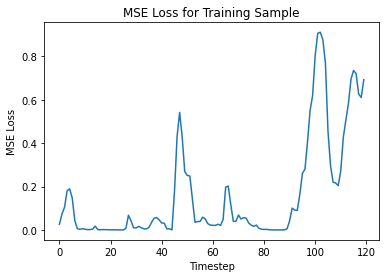

In [20]:
plt.plot(ts, losses)
plt.title("MSE Loss for Training Sample")
plt.xlabel("Timestep")
plt.ylabel("MSE Loss")